# Supervised Machine Learning

## Data

### Loading Data

The first step in any machine learning endeavor is to `get the raw data` into our system.

The raw data might be 
* a logfile, 
* dataset file, 
* or database. 

In reality, often we want to retrieve data from multiple sources

**Installing Python packages**
* Python 

In [1]:
! python -V

Python 3.13.0


* Pip

The additional packages that we will be using throughout this book can be installed via the *pip* installer program, which has been part of the Python standard library since Python 3.3

In [3]:
! pip --version

pip 24.3.1 from c:\Users\hyehoshyna\courses\cs3220\MLintro\.venv\Lib\site-packages\pip (python 3.13)



After we have successfully installed Python, we can execute *pip* from the command line terminal to install additional Python packages:

`pip install SomePackage`


Already installed packages can be updated via the `--upgrade` flag:

`pip install SomePackage --upgrade`

* **Core packages**:
    * NumPy >= 1.17.4
    * scikit-learn >= 0.22.0
    * matplotlib >= 3.1.0
    * pandas >= 0.25.3

In [7]:
try:
    import numpy
except ImportError:
    print ("numpy is not installed")

In [8]:
import numpy as np
np.__version__

'2.1.3'

Since its release in 2007, **scikit-learn** has become one of the most popular open
source machine learning libraries for Python. 

scikit-learn provides algorithms for machine learning tasks including classification, regression, dimensionality reduction,
and clustering

In [11]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

Scikit-learn comes with some `standard machine learning datasets`, which means you’re not required to download them from an external website or database.

Examples of the [toy datasets](scikit-learn.org/stable/datasets/toy_dataset.html) available in sklearn include the iris dataset for classification and the diabetes dataset for regression.

In [12]:
# Load scikit-learn's datasets
from sklearn import datasets

In [13]:
# Load digits dataset
digits = datasets.load_digits()

In [14]:
# Load wine dataset
wine_data = datasets.load_wine() 

Executing the code above returns a `dictionary-like object `containing the `data` along with `metadata` about the data it contains. 

In [16]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

The data we need is in the `.data` key of the dictionary-like object, but since it’s not an actual dictionary, we can access it as an attribute of the `wine_data` instance as follows: 

In [17]:
wine_data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

This returns an N x M array where N is the number of samples and M is the number of features.  

Let’s use this knowledge to load our data into a pandas DataFrame, which is much easier to manipulate and analyze. 

In [19]:
import pandas as pd

# Convert data to pandas dataframe
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add the target label
wine_df["target"] = wine_data.target

# Take a preview
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Creating a Simulated Dataset

Sometimes you need to `generate` a dataset of simulated data.

scikit-learn offers many methods for creating simulated data.
1. When we want a dataset designed to be used with *linear regression*, `make_regression`
is a good choice
2. If we are interested in creating a simulated dataset for *classification*, we can use
`make_classification`
3. if we want a dataset designed to work well with *clustering* techniques, scikitlearn offers `make_blobs`

In [20]:
# Load library
from sklearn.datasets import make_regression

# Generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(n_samples = 100,
n_features = 3,
n_informative = 3,
n_targets = 1,
noise = 0.0,
coef = True,
random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
 [-10.37865986  25.5124503   19.67705609]


In [21]:
# Load library
from sklearn.datasets import make_classification

# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 2,
weights = [.25, .75],
random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


In [22]:
# Load library
from sklearn.datasets import make_blobs

# Generate feature matrix and target vector
features, target = make_blobs(n_samples = 100,
n_features = 2,
centers = 3,
cluster_std = 0.5,
shuffle = True,
random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


We can use the `make_blobs()` function to generate a synthetic *binary classification* dataset.

In [23]:
# define dataset
features, target = make_blobs(n_samples=1000, centers=2, random_state=1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[-3.05837272  4.48825769]
 [-8.60973869 -3.72714879]
 [ 1.37129721  5.23107449]]
Target Vector
 [0 1 0]


In [27]:
np.unique(target)

array([0, 1])

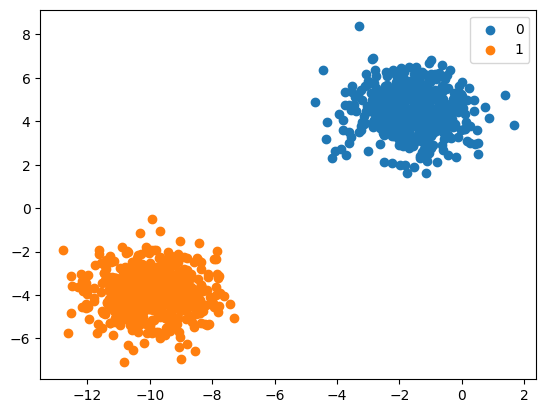

In [28]:
from matplotlib import pyplot

# plot the dataset and color the by class label
for label in np.unique(target):
	row_ix = np.where(target == label)[0]
	pyplot.scatter(features[row_ix, 0], features[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


## Classification in ML

**Classification** is a `supervised` machine learning method

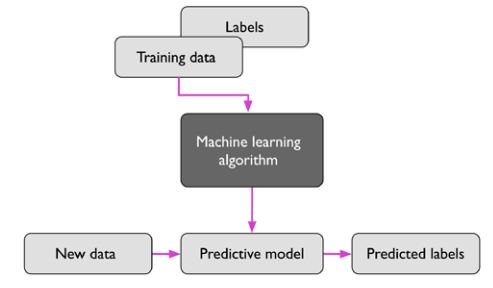

The goal is to `predict the categorical class` *labels* of new instances or data points based on past observations. 

Those class `labels are discrete`

However, the set of class labels does not have to be of a binary nature. The predictive model learned by
a supervised learning algorithm can assign any class label that was presented in the training dataset
to a new, unlabeled data point or instance

### Lazy Learners Vs. Eager Learners

There are 2 types of learners in machine learning classification:
* **Eager learners** 
    * are ML algorithms that first build a model from the training dataset before making any prediction on future datasets. 
    * they spend more time during the training process because of their eagerness to have a better generalization during the training from learning the weights, but they require less time to make predictions. 

Most ML algorithms are eager learners:
* Logistic Regression. 
* Support Vector Machine. 
* Decision Trees. 
* Artificial Neural Networks. 

and

* **Lazy learners or instance-based learners** 
    * do not create any model immediately from the training data
    * they just memorize the training data, and each time there is a need to make a prediction, they search for the nearest neighbor from the whole training data, which makes them very slow during prediction

Some examples of this kind are: 
* K-Nearest Neighbor. 
8 Case-based reasoning. 

Even though `classification` and `regression` are both from the category of supervised learning, **they are NOT the same**

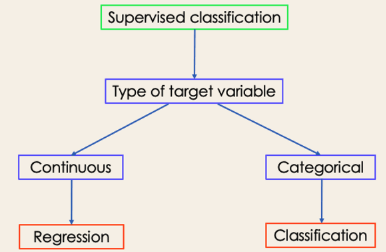

### Different Types of Classification Tasks in ML

There are 4 main classification tasks in Machine learning: *binary, multi-class, multi-label*, and *imbalanced* classifications. 

#### Binary Classification

* The goal is to classify the input data into `2 mutually exclusive categories`. 
* The training data in such a situation is labeled in a binary format: *true* and *false*; *positive* and *negative*

For example, we might want to *detect whether a given image is a truck or a boat*.

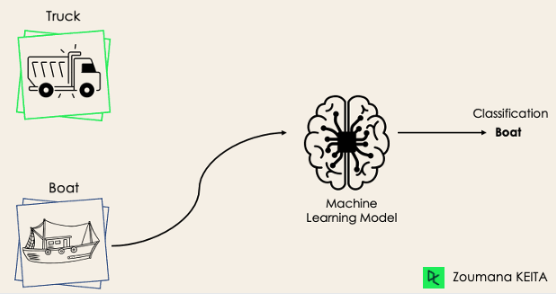

Popular algorithms that can be used for binary classification include:

* Logistic Regression
* k-Nearest Neighbors
* Decision Trees
* Support Vector Machine
* Naive Bayes